## Compare linear vs GP emulators

In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from matplotlib import cm
# our modules
import gp_emulator
import mf_emulator
import linear_emulator
import simplest_emulator
import likelihood
import data_MPGADGET

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#basedir='../../p1d_emulator/sim_suites/emulator_512_15062019/'
basedir='../../p1d_emulator/sim_suites/emulator_256_15072019/'
skewers_label='Ns256_wM0.05'
# option to subsample the redshifts, to make lighter emulators
undersample_z=1
max_arxiv_size=2000
# specify parameters to emulate
emulate_slope=True
emulate_growth=False
emulate_running=False
emulate_pressure=True
#paramList=None
paramList=["Delta2_p","n_p","mF","sigT_Mpc","gamma","kF_Mpc"]

In [5]:
# setup toy data
data = data_MPGADGET.P1D_MPGADGET(filename="1024_L90_mimic.json",z_list=[2.0,3.0,4.0])

In [6]:
# setup likelihood with GP emulator
emu_polyGP=gp_emulator.GPEmulator(basedir=basedir,skewers_label=skewers_label,emu_type="polyfit",
                                        undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                        paramList=paramList,kmax_Mpc=10,train=True)
like_polyGP=likelihood.Likelihood(emulator=emu_polyGP,data=data)

Rescaled params to unity volume
Cannot load emulators with non-standard training data


 /home/font/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Training GP on 2000 points
Optimised
Note: redshifts have been re-sorted (earliest first)


In [7]:
# setup likelihood with GP emulator
emu_kGP=gp_emulator.GPEmulator(basedir=basedir,skewers_label=skewers_label,emu_type="k_bin",
                                       undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                       paramList=paramList,kmax_Mpc=10,train=True)
like_kGP=likelihood.Likelihood(emulator=emu_kGP,data=data)

Rescaled params to unity volume
Cannot load emulators with non-standard training data


 /home/font/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Training GP on 2000 points
Optimised
Note: redshifts have been re-sorted (earliest first)


In [8]:
# setup likelihood with linear emulator
emu_lin=linear_emulator.LinearEmulator(basedir=basedir,skewers_label=skewers_label,
                                       undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                       emulate_slope=emulate_slope,emulate_running=emulate_running,
                                       emulate_pressure=emulate_pressure,emulate_growth=emulate_growth)
like_lin=likelihood.Likelihood(emulator=emu_lin,data=data)

setup interpolator for coefficient 0
[ 0.346      -2.30099985  0.67135879  0.14135394  1.47642148 16.44495773] test [-1.58673304]
setup interpolator for coefficient 1
[ 0.346      -2.30099985  0.67135879  0.14135394  1.47642148 16.44495773] test [-0.68963547]
setup interpolator for coefficient 2
[ 0.346      -2.30099985  0.67135879  0.14135394  1.47642148 16.44495773] test [-0.31313861]
setup interpolator for coefficient 3
[ 0.346      -2.30099985  0.67135879  0.14135394  1.47642148 16.44495773] test [-0.10944376]
setup interpolator for coefficient 4
[ 0.346      -2.30099985  0.67135879  0.14135394  1.47642148 16.44495773] test [-0.02182953]
Note: redshifts have been re-sorted (earliest first)


In [9]:
# setup likelihood with simplest emulator
emu_NGP=simplest_emulator.SimplestEmulator(basedir=basedir,skewers_label=skewers_label,
                                        undersample_z=undersample_z,max_arxiv_size=max_arxiv_size)
like_NGP=likelihood.Likelihood(emulator=emu_NGP,data=data)

Note: redshifts have been re-sorted (earliest first)


In [10]:
# setup likelihood with GP emulator
emu_mf=mf_emulator.MeanFluxEmulator(basedir=basedir,skewers_label=skewers_label,
                                       emu_type="k_bin",max_arxiv_size=max_arxiv_size,
                                       paramList=paramList,kmax_Mpc=10,train=True)
like_mf=likelihood.Likelihood(emulator=emu_mf,data=data)

6750 initial entries
50 final entries
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
Training GP on 50 points
Optimised


 /home/font/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


6750 initial entries
353 final entries
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
Training GP on 353 points
Optimised
6750 initial entries
859 final entries
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
Training GP on 859 points
Optimised
6750 initial entries
1221 final entries
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
Training GP on 1221 points
Optimised
6750 initial entries
1409 final entries
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
Training GP on 1409 points
Optimised
6750 initial entries
1546 final entries
Loading emulator using a specific arxiv,

In [11]:
# get measured bins from data
data=like_NGP.data
k_kms=data.k
zs=data.z
Nz=len(zs)

# ask emulator prediction for P1D in each bin
p1d_kGP = like_kGP.get_p1d_kms(k_kms)
p1d_polyGP = like_polyGP.get_p1d_kms(k_kms)
p1d_lin = like_lin.get_p1d_kms(k_kms)
p1d_NGP = like_NGP.get_p1d_kms(k_kms)
p1d_mf = like_mf.get_p1d_kms(k_kms)

<IPython.core.display.Javascript object>


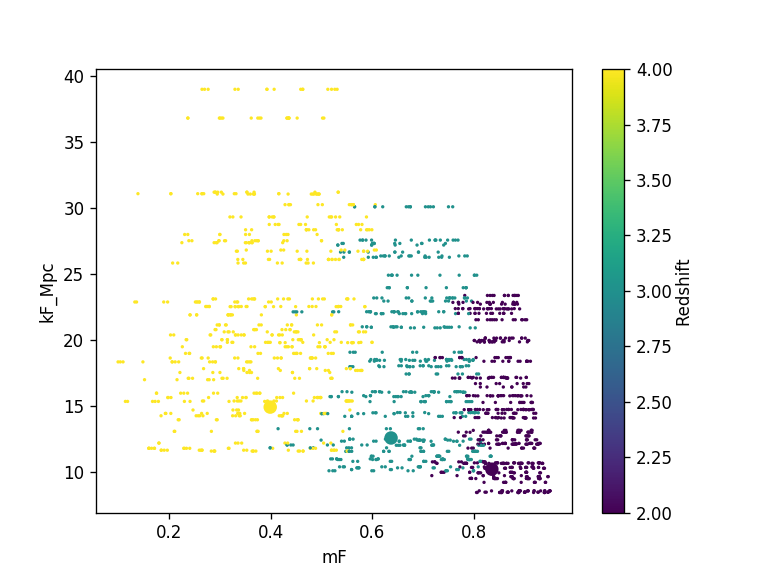

In [12]:
# compare the model we evaluate vs the entries in the archive
plt.figure()
like_kGP.overplot_emulator_calls(param_1='mF',param_2='kF_Mpc')

<IPython.core.display.Javascript object>


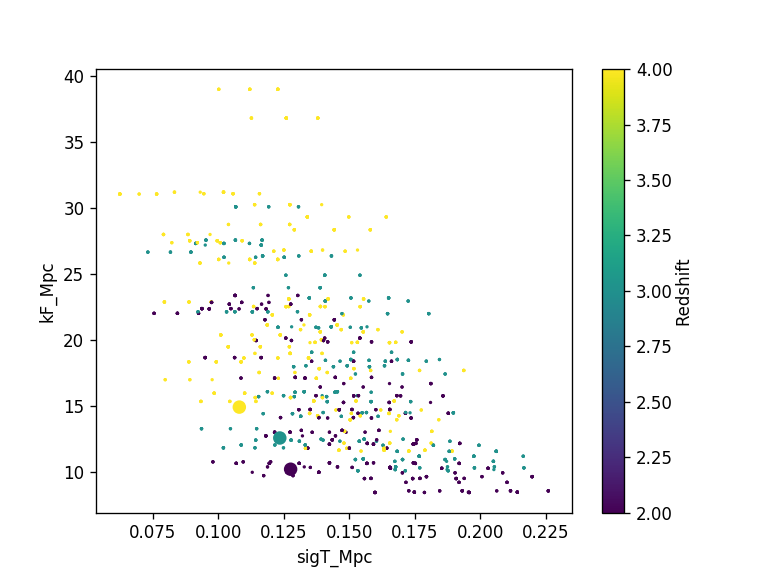

In [13]:
# compare the model we evaluate vs the entries in the archive
plt.figure()
like_kGP.overplot_emulator_calls(param_1='sigT_Mpc',param_2='kF_Mpc')

<IPython.core.display.Javascript object>


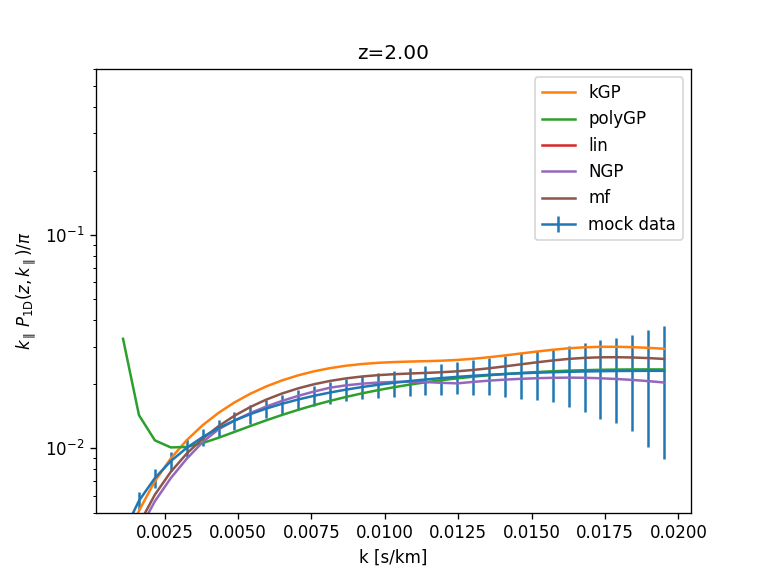

<IPython.core.display.Javascript object>


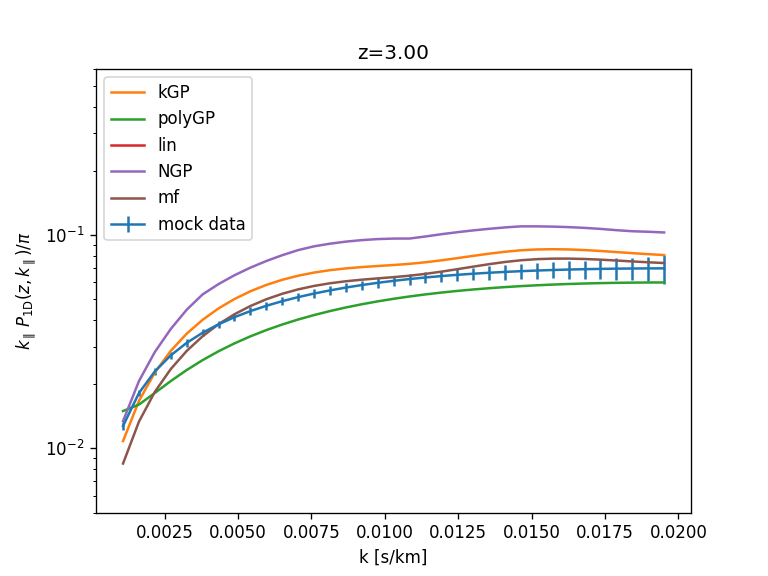

<IPython.core.display.Javascript object>


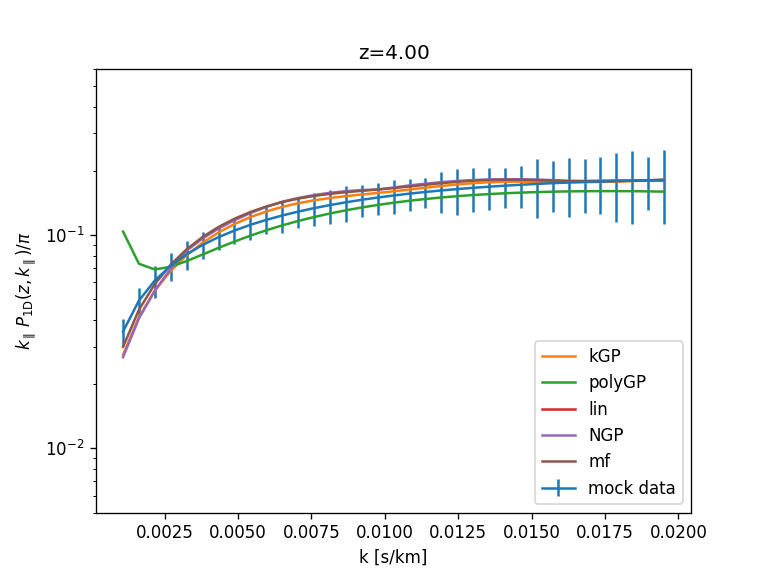

In [14]:
# plot only few redshifts for clarity
every_iz=1
plot_data=True
for iz in range(0,Nz,every_iz):
    # acess data for this redshift
    z=zs[iz]
    p1d_data=data.get_Pk_iz(iz)
    p1d_cov=data.get_cov_iz(iz)
    # predictions for this redshift
    p1d_kGP_iz=p1d_kGP[iz]
    p1d_polyGP_iz=p1d_polyGP[iz]
    p1d_lin_iz=p1d_lin[iz]
    p1d_NGP_iz=p1d_NGP[iz]
    p1d_mf_iz=p1d_mf[iz]
    if p1d_lin_iz is None:
        print(z,'linear emulator did not provide P1D')
        continue
    # plot everything
    plt.figure()
    if plot_data:
        plt.errorbar(k_kms,p1d_data*k_kms/np.pi,
                    yerr=np.sqrt(np.diag(p1d_cov))*k_kms/np.pi,label='mock data')
    plt.plot(k_kms,p1d_kGP_iz*k_kms/np.pi,label='kGP')
    plt.plot(k_kms,p1d_polyGP_iz*k_kms/np.pi,label='polyGP')
    plt.plot(k_kms,p1d_lin_iz*k_kms/np.pi,label='lin')
    plt.plot(k_kms,p1d_NGP_iz*k_kms/np.pi,label='NGP')
    plt.plot(k_kms,p1d_mf_iz*k_kms/np.pi,label='mf')
    plt.title('z=%.2f'%z)
    plt.yscale('log')
    plt.legend()
    plt.xlabel('k [s/km]')
    plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
    plt.ylim(0.005,0.6)